In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from lightgbm import LGBMRegressor
import joblib
import os

In [213]:
df = pd.read_excel('Датасет.xlsx')

In [19]:
def find_count(days, station):
    max_date = df['Date'].max()  
    start_date = max_date - pd.Timedelta(days=days)  
    start_index = df[df['Date'] == start_date].index
    count = df.loc[start_index, station].iloc[0]
    return count


In [105]:
def find_future(days,station):
    
    model =  station_models[station]
    date = df['Date'].max() + pd.Timedelta(days=days)
    dat = pd.DataFrame({'Date':[date]})
    dat['day_sequence'] = range(0,dat.shape[0])
    dat['weekday'] = (dat['Date'].dt.dayofweek < 5).astype(int)
    dat['weekend'] = (dat['Date'].dt.dayofweek >= 5).astype(int)
    dat['month'] = dat['Date'].dt.month
    print(dat)

In [106]:
find_future(1,'Черкизовская')

        Date  day_sequence  weekday  weekend  month
0 2024-04-04             0        1        0      4


## Preprocessing

In [110]:
def prep(data):
    data.fillna(df.mean(),inplace=True)
    data['day'] = data['Date'].dt.day
    data['weekday'] = (data['Date'].dt.dayofweek < 5).astype(int)
    data['weekend'] = (data['Date'].dt.dayofweek >= 5).astype(int)
    data['month'] = data['Date'].dt.month
    data = data.drop(['Воробьевы горы С','Воробьёвы горы С','Авиамоторная БКЛ','К'],axis=1)
    data.rename({'Авиамоторная БКЛ.1':'Авиамоторная БКЛ'})
    
    return data

In [111]:
df =prep(df)

In [112]:
df

,Date,Б.Рокоссовского,Черкизовская,Преображенск. пл,Сокольники СЛ,Красносельская,Комсомольск. СЛ,Красные ворота,Чистые пруды,Лубянка,...,Пыхтино,Аэропорт Внуково,Яхромская,Лианозово,Физтех,Текстильщики СЦ,day,weekday,weekend,month
0,2024-01-01,16671,6248,14094,18651,7391,8883,3067,12873,8554,...,8390,15787,9813,18978,1476,18055,1,1,0,1
1,2024-01-02,15113,5441,1132,10083,19339,15442,7139,11038,15482,...,16045,10257,19663,8499,2893,18422,2,1,0,1
2,2024-01-03,2905,7991,6556,6488,15424,15055,18002,2430,6545,...,18903,13493,12491,2959,9897,14815,3,1,0,1
3,2024-01-04,13998,14864,7265,6409,10725,2531,19411,18152,10221,...,13176,8656,9180,12203,9793,16915,4,1,0,1
4,2024-01-05,12742,10015,4001,9446,5965,7285,9990,7456,9020,...,16827,5761,3563,9070,9822,6052,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2024-03-30,13714,6496,8365,18759,7746,5709,1873,15867,4428,...,14040,19801,14759,5616,3834,13438,30,0,1,3
90,2024-03-31,2561,15991,2811,5573,8936,15712,2772,11590,10987,...,10988,17569,14798,16496,5997,7997,31,0,1,3
91,2024-04-01,11209,7029,5004,15017,11373,5649,10104,4453,5127,...,8035,13950,17189,8603,5933,10796,1,1,0,4
92,2024-04-02,2722,3999,17068,14176,19561,4700,3868,14364,15485,...,11124,7545,3864,16046,4969,11741,2,1,0,4


## EDA

In [ ]:
plt.figure(figsize=(8,6))
for station in df.columns[1:]:  # Начинаем с индекса 1, так как первый столбец содержит даты
    plt.plot(df['Date'], df[station], label=station)

# Добавляем подписи к осям и легенду
plt.xlabel('Date')
plt.ylabel('Passenger Flow')
plt.title('Passenger Flow at Different Stations Over Time')
plt.legend()

# Отображаем график
plt.show()


##  Train
`

### Времменные ряды

NameError: name 'data' is not defined

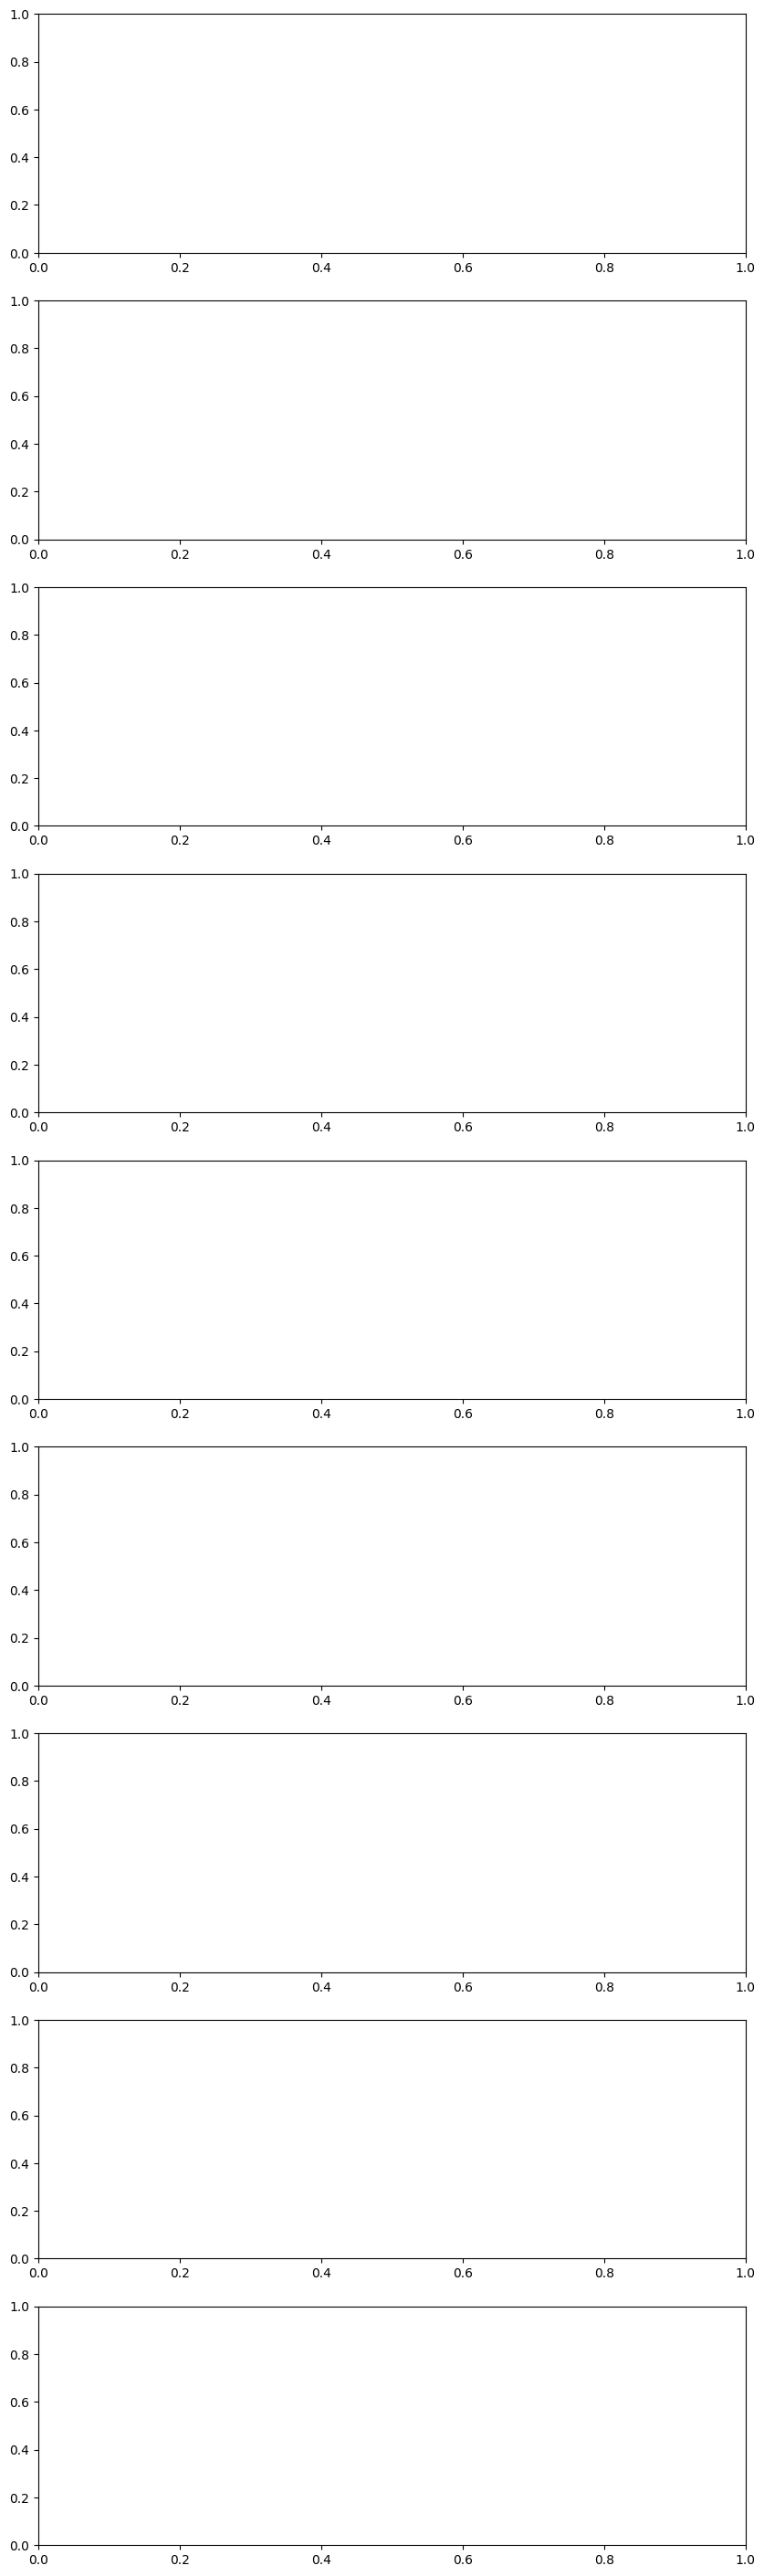

In [81]:
import matplotlib.pyplot as plt

# Создание подложки для графиков
fig, axes = plt.subplots(len(stations), figsize=(10, 4*len(stations)))

for i, station in enumerate(stations):
    # Разделение данных на обучающий и тестовый наборы
    train, test = data[station].iloc[:-30], data[station].iloc[-30:]

    # Создание и обучение модели SARIMA
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()

    # Прогнозирование
    forecast = model_fit.forecast(30)

    # Получаем фактические и предсказанные значения
    pred = model_fit.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)

    # Построение графика сравнения предсказанных и фактических значений для текущей станции
    axes[i].plot(train.index, train, label='Train')
    axes[i].plot(test.index, test, label='Test')
    axes[i].plot(pred.predicted_mean.index, pred.predicted_mean, color='red', label='Predicted')
    axes[i].fill_between(pred.conf_int().index, pred.conf_int()['lower '+station], pred.conf_int()['upper '+station], color='pink', alpha=0.5)
    axes[i].set_title(f'Station: {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passengers')
    axes[i].legend()

# Размещение графиков
plt.tight_layout()
plt.show()


### Линейка

MSE for Б.Рокоссовского: 40708119.19039013
MSE for Черкизовская: 43840522.02984037
MSE for Преображенск. пл: 27511759.98457713
MSE for Сокольники СЛ: 36633937.25502129


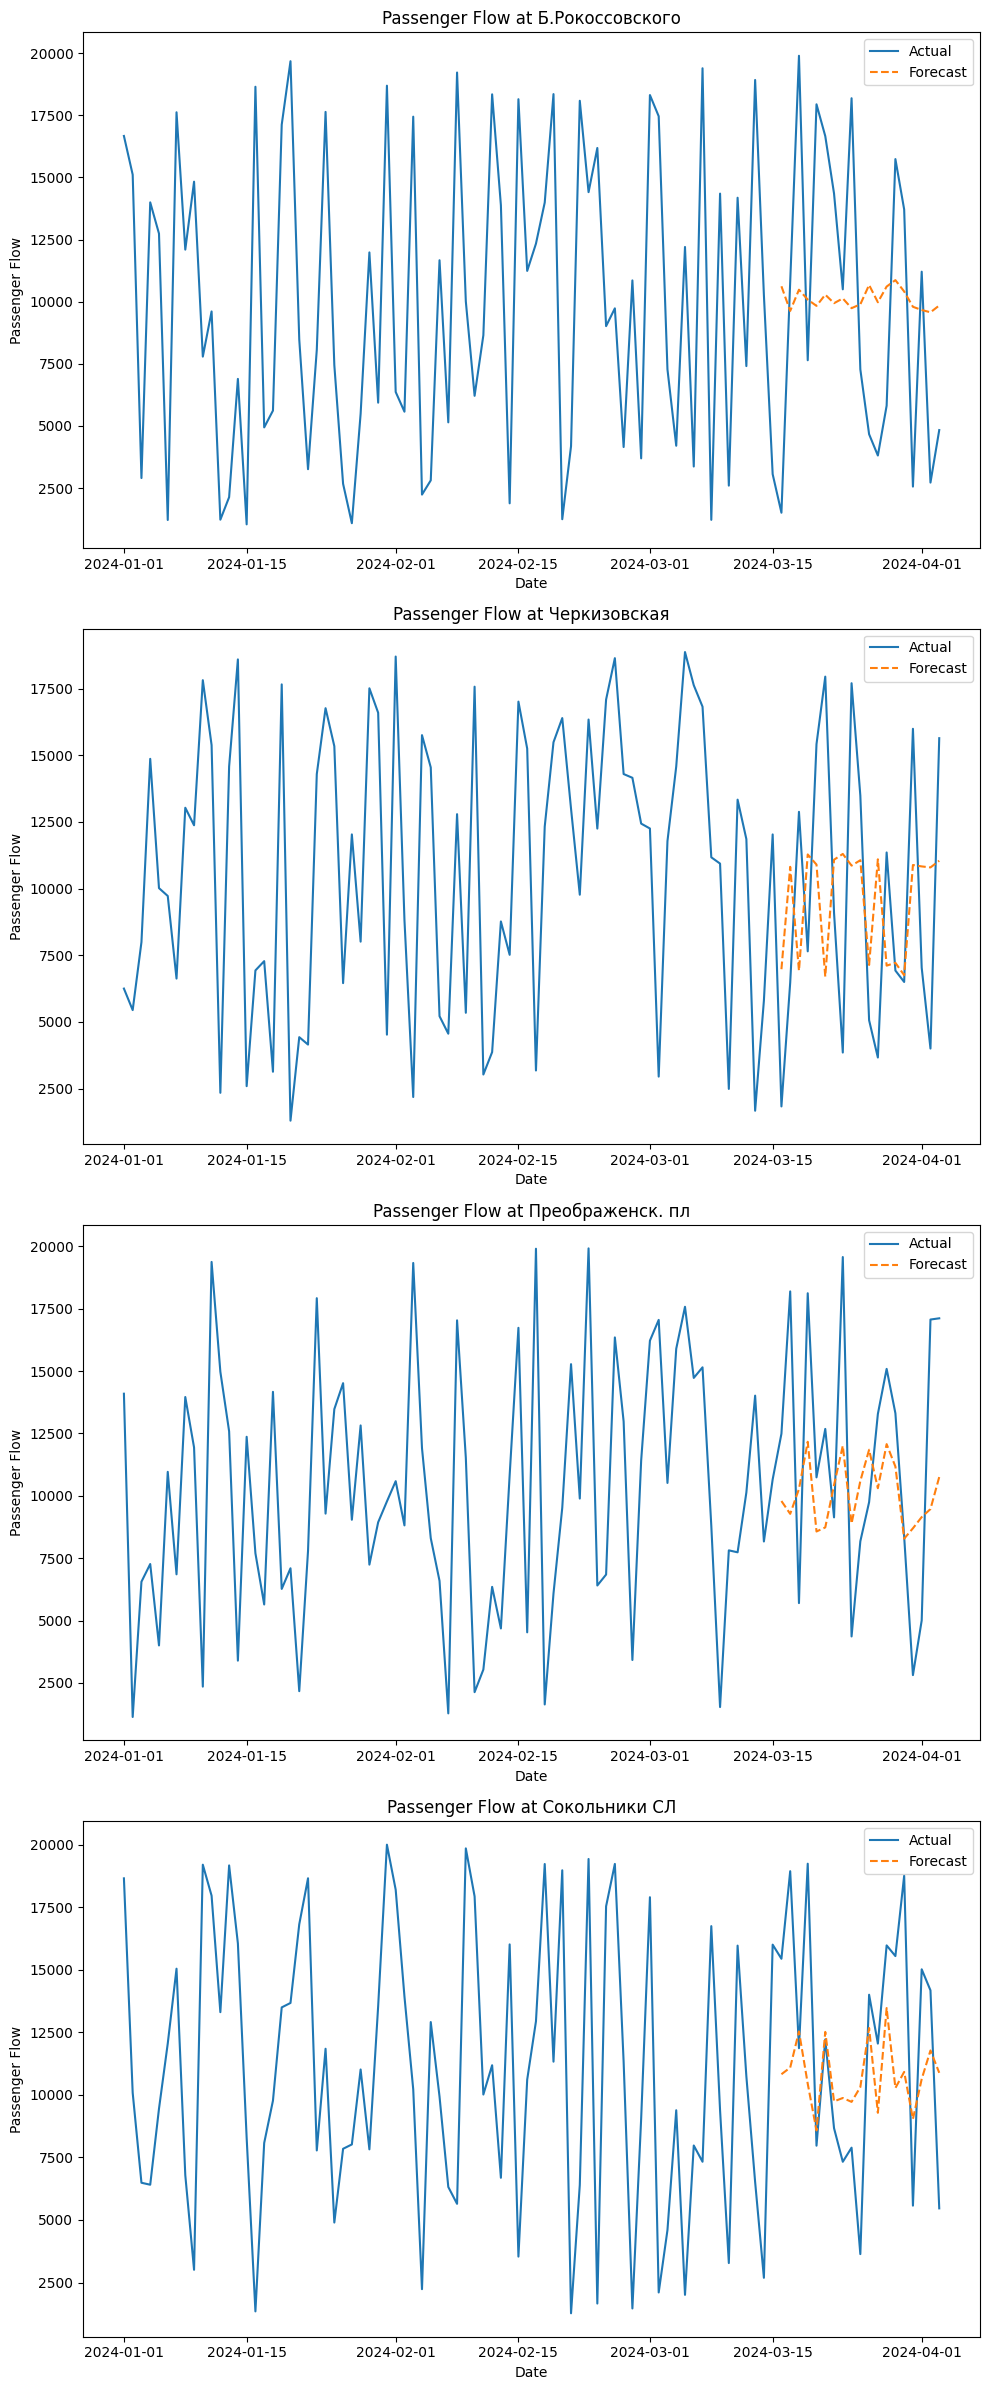

In [119]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

# Получаем список станций
stations = df.columns[1:5]  # Первый столбец содержит даты, поэтому начинаем с индекса 1

# Создаем фигуру для графиков
fig, axes = plt.subplots(len(stations), figsize=(10, 6*len(stations)))

# Перебираем каждую станцию
for i, station in enumerate(stations):
    # Разделение данных на признаки (X) и целевую переменную (y)
    X = df[['day','weekday','weekend','month']]  # Исключаем столбец с датами и текущую станцию
    y = df[station]

    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Создание и обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(X_train, y_train)


    # Прогнозирование на тестовом наборе
    y_pred = model.predict(X_test)

    # Вычисление MSE на тестовом наборе
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for {station}: {mse}")

    # Построение графика фактических и предсказанных значений
    axes[i].plot(df['Date'], y, label='Actual')
    axes[i].plot(df['Date'][-len(y_pred):], y_pred, label='Forecast', linestyle='--')
    axes[i].set_title(f'Passenger Flow at {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passenger Flow')
    axes[i].legend()

# Размещение графиков
plt.tight_layout()

plt.show()


In [118]:
X_test

,day,weekday,weekend
40,10,0,1
22,23,1,0
55,25,0,1
72,13,1,0
0,1,1,0
26,27,0,1
39,9,1,0
67,8,1,0
10,11,1,0
44,14,1,0


### Лес

MSE for Б.Рокоссовского: 57354478.425557904
MSE for Черкизовская: 45825815.44835789
MSE for Преображенск. пл: 37984822.266436845
MSE for Сокольники СЛ: 53953488.79760526


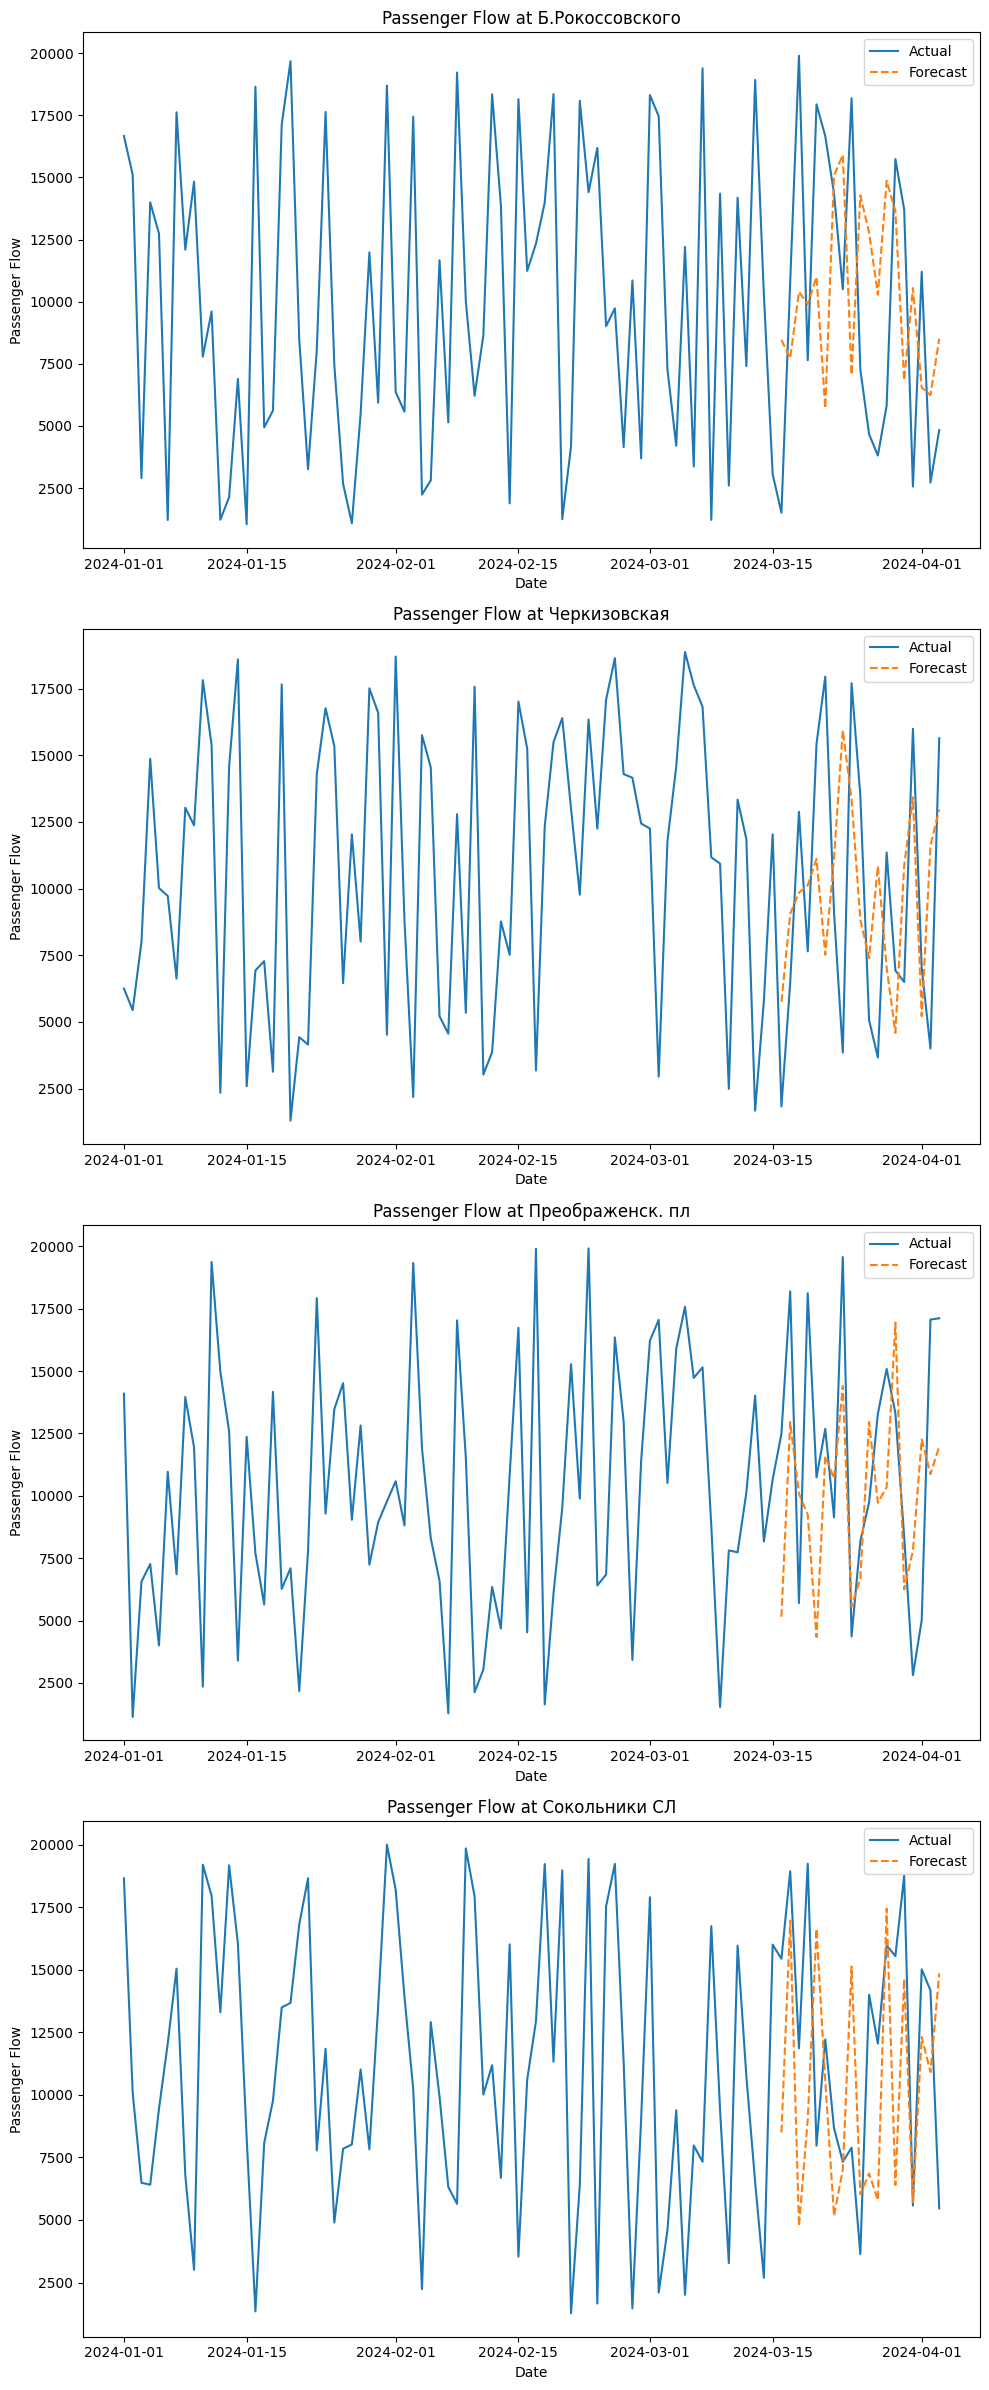

In [120]:

from sklearn.ensemble import RandomForestRegressor

# Получаем список станций
stations = df.columns[1:5]  # Первый столбец содержит даты, поэтому начинаем с индекса 1

# Создаем фигуру для графиков
fig, axes = plt.subplots(len(stations), figsize=(10, 6*len(stations)))

# Перебираем каждую станцию
for i, station in enumerate(stations):
    # Разделение данных на признаки (X) и целевую переменную (y)
    X = df[['day','weekday','weekend','month']]  # Исключаем столбец с датами и текущую станцию
    y = df[station]

    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Создание и обучение модели линейной регрессии
    model = RandomForestRegressor()
    model.fit(X_train, y_train)


    # Прогнозирование на тестовом наборе
    y_pred = model.predict(X_test)

    # Вычисление MSE на тестовом наборе
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for {station}: {mse}")

    # Построение графика фактических и предсказанных значений
    axes[i].plot(df['Date'], y, label='Actual')
    axes[i].plot(df['Date'][-len(y_pred):], y_pred, label='Forecast', linestyle='--')
    axes[i].set_title(f'Passenger Flow at {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passenger Flow')
    axes[i].legend()

# Размещение графиков
plt.tight_layout()

plt.show()


### Коты

Learning rate set to 0.027192
0:	learn: 5916.5647233	total: 512us	remaining: 512ms
1:	learn: 5901.9873571	total: 953us	remaining: 476ms
2:	learn: 5891.7887165	total: 1.32ms	remaining: 438ms
3:	learn: 5890.1527478	total: 1.57ms	remaining: 391ms
4:	learn: 5889.8356997	total: 1.7ms	remaining: 339ms
5:	learn: 5879.0094515	total: 2.01ms	remaining: 334ms
6:	learn: 5876.1747789	total: 2.19ms	remaining: 311ms
7:	learn: 5856.8521776	total: 2.48ms	remaining: 308ms
8:	learn: 5856.5709406	total: 2.6ms	remaining: 286ms
9:	learn: 5846.6522879	total: 2.84ms	remaining: 281ms
10:	learn: 5836.3937531	total: 3.15ms	remaining: 283ms
11:	learn: 5827.8005146	total: 3.42ms	remaining: 282ms
12:	learn: 5826.1886240	total: 3.56ms	remaining: 270ms
13:	learn: 5818.1883835	total: 3.86ms	remaining: 272ms
14:	learn: 5812.1144741	total: 4.08ms	remaining: 268ms
15:	learn: 5810.4781549	total: 4.3ms	remaining: 265ms
16:	learn: 5805.8841960	total: 4.62ms	remaining: 267ms
17:	learn: 5803.0034280	total: 4.89ms	remaining: 2

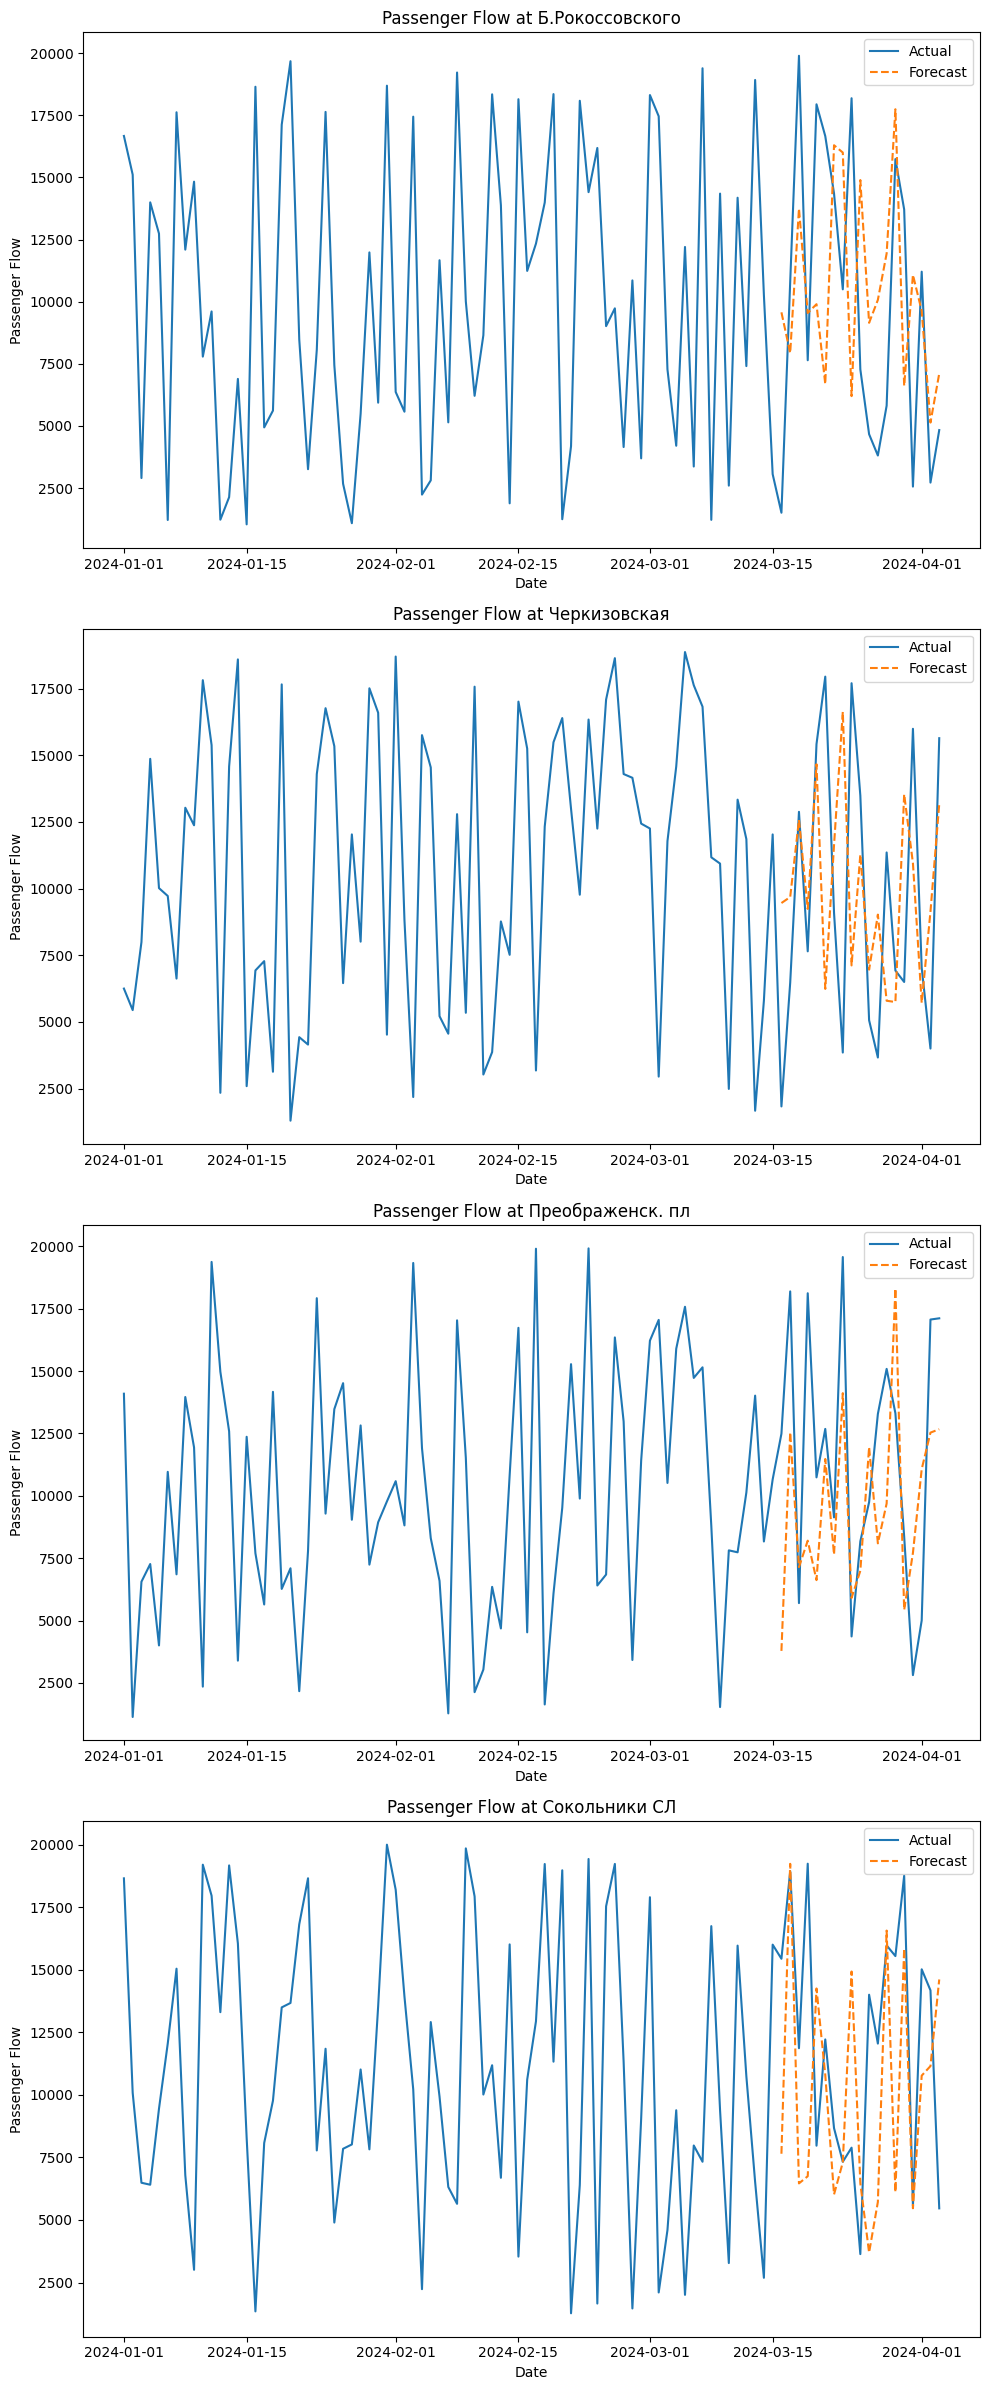

In [122]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Получаем список станций
stations = df.columns[1:5]  # Первый столбец содержит даты, поэтому начинаем с индекса 1

station_models={}
# Создаем фигуру для графиков
fig, axes = plt.subplots(len(stations), figsize=(10, 6*len(stations)))

# Перебираем каждую станцию
for i, station in enumerate(stations):
    # Разделение данных на признаки (X) и целевую переменную (y)
    X = df[['day','weekday','weekend','month']]  # Исключаем столбец с датами и текущую станцию
    y = df[station]

    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Создание и обучение модели линейной регрессии
    model = CatBoostRegressor()
    model.fit(X_train, y_train)


    # Прогнозирование на тестовом наборе
    y_pred = model.predict(X_test)

    # Вычисление MSE на тестовом наборе
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for {station}: {mse}")

    # Построение графика фактических и предсказанных значений
    axes[i].plot(df['Date'], y, label='Actual')
    axes[i].plot(df['Date'][-len(y_pred):], y_pred, label='Forecast', linestyle='--')
    axes[i].set_title(f'Passenger Flow at {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passenger Flow')
    axes[i].legend()

    station_models[station] = model

# Размещение графиков
plt.tight_layout()

plt.show()


### XGBoost

In [35]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Создаем словарь, где ключами будут названия станций, а значениями - обученные модели
station_models = {}

# Получаем список станций
stations = df.columns[1:5]  # Первый столбец содержит даты, поэтому начинаем с индекса 1

# Перебираем каждую станцию
for station in stations:
    # Разделение данных на признаки (X) и целевую переменную (y)
    X = df[['day_sequence','weekday','weekend']]  # Исключаем столбец с датами и текущую станцию
    y = df[station]

    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Создание и обучение модели XGBoost для текущей станции
    model = XGBRegressor()
    model.fit(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE for {station}: {mae}")

    # Построение графика фактических и предсказанных значений
    axes[i].plot(df['day_sequence'], y, label='Actual')
    axes[i].plot(df['day_sequence'][-len(y_pred):], y_pred, label='Forecast', linestyle='--')
    axes[i].set_title(f'Passenger Flow at {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passenger Flow')
    axes[i].legend()
    # Сохранение модели в словаре
    #station_models[station] = model



MAE for Б.Рокоссовского: 6563.255097116573
MAE for Черкизовская: 4679.765154658558
MAE for Преображенск. пл: 4229.111360484181
MAE for Сокольники СЛ: 5910.712521137194


In [126]:
for station in stations:
    # Разделение данных на признаки (X) и целевую переменную (y)
    X = df[['day','weekday','weekend','month']]  # Исключаем столбец с датами и текущую станцию
    y = df[station]

    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Разделение данных на обучающий и тестовый наборы)
    print('-'*50)
    print(station)
    print("Линейка")
    model1 = LinearRegression()
    model1.fit(X_train,y_train)
    print(mean_absolute_percentage_error(y_test,model1.predict(X_test)))
    print("Лес")
    model2 = RandomForestRegressor()
    model2.fit(X_train,y_train)
    print(mean_absolute_percentage_error(y_test,model2.predict(X_test)))
    print("Коты")
    model3 = CatBoostRegressor(verbose=0)
    model3.fit(X_train,y_train)
    print(mean_absolute_percentage_error(y_test,model3.predict(X_test)))
    print("XGBoost")
    model4 = XGBRegressor()
    model4.fit(X_train,y_train)
    print(mean_absolute_percentage_error(y_test,model4.predict(X_test)))
    print("LightGB")
    model4 = LGBMRegressor()
    model4.fit(X_train,y_train)
    print(mean_absolute_percentage_error(y_test,model4.predict(X_test)))
    print('-'*50)

--------------------------------------------------
Б.Рокоссовского
Линейка
1.7762359957224447
Лес
1.996809424325838
Коты
2.058708100875671
XGBoost
2.2278327409096463
LightGB
1.7986109151379255
--------------------------------------------------
--------------------------------------------------
Черкизовская
Линейка
0.7213099699281947
Лес
0.6860583455846336
Коты
0.7225038390763135
XGBoost
0.7852261188898684
LightGB
0.5730494845855441
--------------------------------------------------
--------------------------------------------------
Преображенск. пл
Линейка
0.7648979935866523
Лес
0.7760695357292028
Коты
0.7029548464641389
XGBoost
0.6938633129268721
LightGB
0.8032837032901468
--------------------------------------------------
--------------------------------------------------
Сокольники СЛ
Линейка
0.49014206742672595
Лес
0.5164076138967084
Коты
0.5380743092248427
XGBoost
0.7070898863823231
LightGB
0.45651455393609086
--------------------------------------------------
--------------------

### LightGB

In [220]:
df.columns[1:] 

Index(['Бульвар Рокоссовского', 'Черкизовская', 'Преображенская пл',
       'Сокольники Сокольническая', 'Красносельская',
       'Комсомольская Скольническая', 'Красные ворота', 'Чистые пруды',
       'Лубянка', 'Охотный ряд',
       ...
       'Нижегородская БКЛ', 'Каширская Замоскворецкая',
       'Нижегородская Некрасовская', 'К', 'Пыхтино', 'Аэропорт Внуково',
       'Яхромская', 'Лианозово', 'Физтех', 'Текстильщики БКЛ.1'],
      dtype='object', length=322)

In [207]:

save_dir = 'models'

# Получаем список станций
stations = df.columns[1:]  # Первый столбец содержит даты, поэтому начинаем с индекса 1

station_models={}
# Создаем фигуру для графиков


# Перебираем каждую станцию
for i, station in enumerate(stations):
    # Разделение данных на признаки (X) и целевую переменную (y)
    X = df[['day','weekday','weekend','month']]  # Исключаем столбец с датами и текущую станцию
    y = df[station]

    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Создание и обучение модели линейной регрессии
    model = LGBMRegressor()
    model.fit(X_train, y_train)


    # Прогнозирование на тестовом наборе
    #   y_pred = model.predict(X_test)

    # Вычисление MSE
    #  на тестовом наборе
    #mse = mean_absolute_percentage_error(y_test, y_pred)
    #print(f"MSE for {station}: {mse}")

    

    # Сохранение модели
     # Сохранение модели в папку
    filename = os.path.join(save_dir, f"{station}_model.joblib")
    joblib.dump(model, filename)

    # Добавление модели в словарь
    station_models[station] = filename

    # Добавление модели в словарь


In [210]:
def find_future(days, station):
    # Загрузка моделей
    loaded_models = {}
    for station_name, filename in station_models.items():
        loaded_models[station_name] = joblib.load(filename)
    
    # Выбор соответствующей модели для станции
    model = loaded_models[station]
    
    # Генерация даты в будущем
    date = df['Date'].max() + pd.Timedelta(days=days)
    
    # Создание DataFrame для прогнозирования
    dat = pd.DataFrame({'Date': [date]})
    dat['day'] = dat['Date'].dt.day
    dat['weekday'] = (dat['Date'].dt.dayofweek < 5).astype(int)
    dat['weekend'] = (dat['Date'].dt.dayofweek >= 5).astype(int)
    dat['month'] = dat['Date'].dt.month
    
    # Прогнозирование и округление
    pred = model.predict(dat.iloc[:, 1:])
    prediction = int(round(pred[0]))
    
    return prediction, date


In [218]:
station_models

{'Б.Рокоссовского': 'models\\Б.Рокоссовского_model.joblib',
 'Черкизовская': 'models\\Черкизовская_model.joblib',
 'Преображенск. пл': 'models\\Преображенск. пл_model.joblib',
 'Сокольники СЛ': 'models\\Сокольники СЛ_model.joblib',
 'Красносельская': 'models\\Красносельская_model.joblib',
 'Комсомольск. СЛ': 'models\\Комсомольск. СЛ_model.joblib',
 'Красные ворота': 'models\\Красные ворота_model.joblib',
 'Чистые пруды': 'models\\Чистые пруды_model.joblib',
 'Лубянка': 'models\\Лубянка_model.joblib',
 'Охотный ряд': 'models\\Охотный ряд_model.joblib',
 'Кропоткинская': 'models\\Кропоткинская_model.joblib',
 'Парк культуры СЛ': 'models\\Парк культуры СЛ_model.joblib',
 'Фрунзенская': 'models\\Фрунзенская_model.joblib',
 'Спортивная': 'models\\Спортивная_model.joblib',
 'Воробьёвы горы': 'models\\Воробьёвы горы_model.joblib',
 'Университет': 'models\\Университет_model.joblib',
 'Пр-т Вернадск.СЛ': 'models\\Пр-т Вернадск.СЛ_model.joblib',
 'Юго-западная': 'models\\Юго-западная_model.jobli

In [216]:
find_future(35,'Каховская')

(11366, Timestamp('2024-05-08 00:00:00'))